# COVID-19 (2019-nCoV) Outbreak in Ecuador - Exploratory Data Analysis

#### By Marcelo Ortiz Villavicencio

Data avaliable at: https://github.com/CSSEGISandData/COVID-19

## Background

The first big news in the World at the beginning of 2020 is the COVID-19 Outbreak in China, starting from Wuhan, Hubei Province in December 2019. 

As the situation evolves quickly, this notebook will be frequently updated as well.

In [17]:
# Importing libraries. Note: For replication you need to have installed this libraries. If not, please try: 
# import sys
# !{sys.executable} -m pip install plotly
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.graph_objects as go
import os
import folium
from folium.plugins import HeatMap, HeatMapWithTime
import datetime as dt
import statistics as stat
import scipy.stats as st
import scipy
import warnings
import statsmodels as sm
from sklearn import preprocessing

## Import data

In [25]:
today_csv = dt.datetime.now().strftime("%m-%d-%Y") + '.csv'
url_confirmed = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
url_deaths = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
#url_recovered = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv' 
url_daily = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'

df_confirmed = pd.read_csv(url_confirmed)
df_death = pd.read_csv(url_deaths)
df_recovered = pd.read_csv(url_recovered)
df_daily = pd.read_csv(url_daily + today_csv)

In [26]:
# adjusting last real data for Ecuador
df_confirmed.loc[(df_confirmed['Country/Region'] == 'Ecuador'), '3/15/20'] = 37
df_confirmed.loc[(df_confirmed['Country/Region'] == 'Ecuador'), '3/16/20'] = 58
df_confirmed.loc[(df_confirmed['Country/Region'] == 'Ecuador'), '3/17/20'] = 111
df_confirmed.loc[(df_confirmed['Country/Region'] == 'Ecuador'), '3/18/20'] = 168
df_confirmed.loc[(df_confirmed['Country/Region'] == 'Ecuador'), '3/19/20'] = 260
df_confirmed.loc[(df_confirmed['Country/Region'] == 'Ecuador'), '3/20/20'] = 426
df_confirmed.loc[(df_confirmed['Country/Region'] == 'Ecuador'), '3/21/20'] = 532
df_confirmed.loc[(df_confirmed['Country/Region'] == 'Ecuador'), '3/22/20'] = 789
df_confirmed.loc[(df_confirmed['Country/Region'] == 'Ecuador'), '3/23/20'] = 981



df_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,11,16,21,22,22,22,24,24,40,40
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,38,42,51,55,59,64,70,76,89,104
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,37,48,54,60,74,87,90,139,201,230
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,1,1,2,39,39,53,75,88,113,133
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2,2,3


In [27]:
df_death.loc[(df_death['Country/Region'] == 'Ecuador'), '3/18/20'] = 3
df_death.loc[(df_death['Country/Region'] == 'Ecuador'), '3/19/20'] = 4
df_death.loc[(df_death['Country/Region'] == 'Ecuador'), '3/20/20'] = 7
df_death.loc[(df_death['Country/Region'] == 'Ecuador'), '3/21/20'] = 7
df_death.loc[(df_death['Country/Region'] == 'Ecuador'), '3/22/20'] = 14
df_death.loc[(df_death['Country/Region'] == 'Ecuador'), '3/23/20'] = 18



df_death.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,11,16,21,22,22,22,24,24,40,40
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,38,42,51,55,59,64,70,76,89,104
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,37,48,54,60,74,87,90,139,201,230
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,1,1,2,39,39,53,75,88,113,133
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2,2,3


In [28]:
#df_recovered.loc[(df_recovered['Country/Region'] == 'Ecuador'), '3/19/20'] = 2
#df_recovered.loc[(df_recovered['Country/Region'] == 'Ecuador'), '3/20/20'] = 3
#df_recovered.loc[(df_recovered['Country/Region'] == 'Ecuador'), '3/21/20'] = 3
#df_recovered.loc[(df_recovered['Country/Region'] == 'Ecuador'), '3/22/20'] = 3
#df_recovered.loc[(df_recovered['Country/Region'] == 'Ecuador'), '3/23/20'] = 3

#df_recovered.head()

In [29]:
df_daily.loc[(df_daily['Country_Region'] == 'Ecuador'), 'Confirmed'] = 981
df_daily.loc[(df_daily['Country_Region'] == 'Ecuador'), 'Deaths'] = 18
df_daily.loc[(df_daily['Country_Region'] == 'Ecuador'), 'Recovered'] = 3


df_daily.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-03-23 23:19:34,34.223334,-82.461707,1,0,0,0,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-03-23 23:19:34,30.295065,-92.414197,1,0,0,0,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-03-23 23:19:34,37.767072,-75.632346,1,0,0,0,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-03-23 23:19:34,43.452658,-116.241552,13,0,0,0,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-03-23 23:19:34,41.330756,-94.471059,1,0,0,0,"Adair, Iowa, US"


In [30]:
print(f"Number of Countries: {df_daily['Country_Region'].nunique()}")

Number of Countries: 168


In [31]:
# Dealing with missing values
df_confirmed.isna().sum()[df_confirmed.isna().sum() > 0]

Province/State    164
dtype: int64

In [34]:
#df_recovered.isna().sum()[df_recovered.isna().sum() > 0]

In [33]:
df_death.isna().sum()[df_death.isna().sum() > 0]

Province/State    164
dtype: int64

In [35]:
df_confirmed = df_confirmed.fillna('unknow')
#df_recovered = df_recovered.fillna('unknow')
df_death = df_death.fillna('unknow')

## Total cases in Ecuador

In [36]:
# creating a subset with confirmed cases in Ecuador
confirmed_ec = df_confirmed[df_confirmed['Country/Region'] == 'Ecuador']
confirmed_ec = confirmed_ec.groupby(confirmed_ec['Country/Region']).sum()
confirmed_ec = confirmed_ec.iloc[0][2:confirmed_ec.shape[1]]

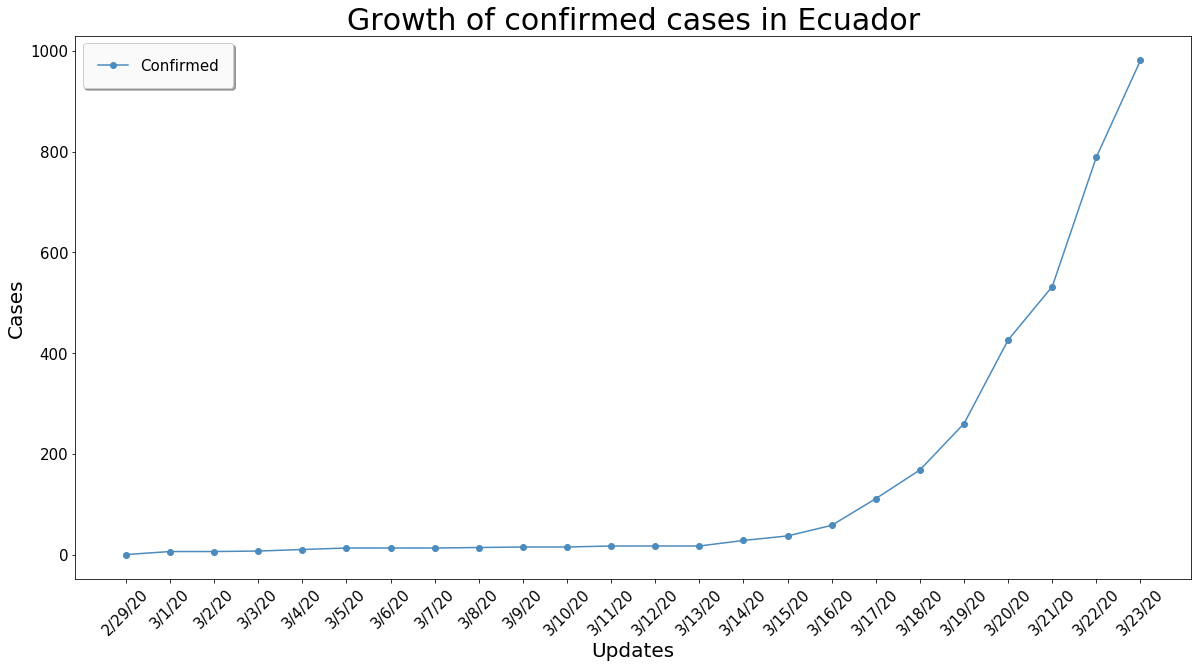

In [37]:
confirmed_ec = confirmed_ec[38:]

# set plotsize
plt.figure(figsize=(20,10))

# creating the plot
plt.plot(confirmed_ec
        , color = '#4b8bbe'
        , label = 'Confirmed'
        , marker = 'o')

# titles parameters
plt.title('Growth of confirmed cases in Ecuador',size=30)
plt.ylabel('Cases',size=20)
plt.xlabel('Updates',size=20)
plt.xticks(rotation=45,size=15)
plt.yticks(size=15)

# legend parameters
plt.legend(loc = "upper left"
           , frameon = True
           , fontsize = 15
           , ncol = 1
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1)

### Forecast of Confirmed Cases Ecuador

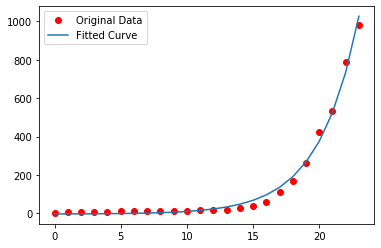

In [38]:
days_vec = np.array([i for i in range(len(confirmed_ec))])

x = np.array(days_vec, dtype = float)
y = np.array(confirmed_ec, dtype = float)

def func(x, a, b, c):
    return a*np.exp(b*x)+c

popt, pcov = scipy.optimize.curve_fit(func, x, y)

plt.plot(x, y, 'ro', label = "Original Data")
plt.plot(x, func(x, *popt), label = "Fitted Curve")


plt.legend(loc='upper left')
plt.show()

In [39]:
for day in range(23,26):
    y_hat = func(day, *popt)
    sup = y_hat + st.norm.ppf(0.95)*np.sqrt((y_hat**2)/len(confirmed_ec))
    inf = y_hat - st.norm.ppf(0.95)*np.sqrt((y_hat**2)/len(confirmed_ec))
    print(str(day) + '/03/2020: ' + str(round(y_hat)) + ' cases ' + '[' + str(round(inf)) + ' - ' +str(round(sup)) + ']')

23/03/2020: 1026.0 cases [682.0 - 1371.0]
24/03/2020: 1434.0 cases [953.0 - 1916.0]
25/03/2020: 2004.0 cases [1331.0 - 2677.0]


In [40]:
def confirmed_cases_by_country(dataframe, country):
    values = dataframe[dataframe['Country/Region'] == country]
    values = values.groupby(values['Country/Region']).sum()
    values = values.iloc[0][2:values.shape[1]]
    return values

In [41]:
confirmed_chile = confirmed_cases_by_country(dataframe = df_confirmed, country = 'Chile')
confirmed_colombia = confirmed_cases_by_country(dataframe = df_confirmed, country = 'Colombia')
confirmed_peru = confirmed_cases_by_country(dataframe = df_confirmed, country = 'Peru')
confirmed_brasil = confirmed_cases_by_country(dataframe = df_confirmed, country = 'Brazil')
confirmed_argentina = confirmed_cases_by_country(dataframe = df_confirmed, country = 'Argentina')

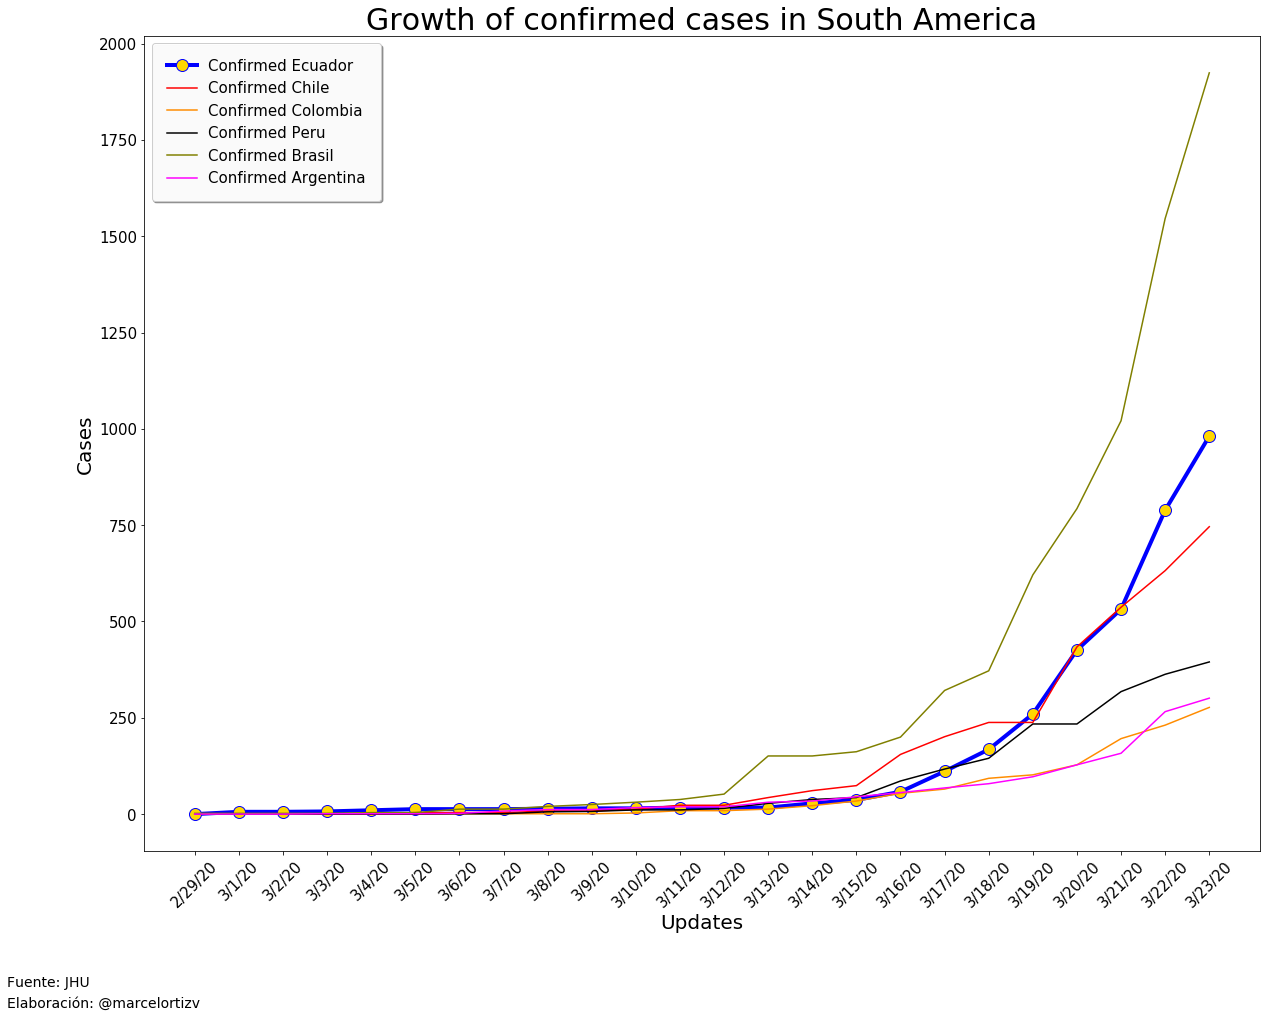

In [42]:
# set plotsize
plt.figure(figsize=(20,15))

# creating the plot
plt.plot(confirmed_ec
        , color = 'blue'
        , label = 'Confirmed Ecuador'
        , marker = 'o'
        , markerfacecolor='gold'
        , markersize=12
        , linewidth=4)
plt.plot(confirmed_chile[38:]
        , color = 'red'
        , label = 'Confirmed Chile'
        , marker = '')
plt.plot(confirmed_colombia[38:]
        , color = 'darkorange'
        , label = 'Confirmed Colombia'
        , marker = '')
plt.plot(confirmed_peru[38:]
        , color = 'black'
        , label = 'Confirmed Peru'
        , marker = '')
plt.plot(confirmed_brasil[38:]
        , color = 'olive'
        , label = 'Confirmed Brasil'
        , marker = '')
plt.plot(confirmed_argentina[38:]
        , color = 'magenta'
        , label = 'Confirmed Argentina'
        , marker = '')

# titles parameters
plt.title('Growth of confirmed cases in South America',size=30)
plt.ylabel('Cases',size=20)
plt.xlabel('Updates',size=20)
plt.xticks(rotation=45,size=15)
plt.yticks(size=15)
plt.text(0.03, 0, 'Fuente: JHU', fontsize=14, transform=plt.gcf().transFigure)
plt.text(0.03, -0.02, 'Elaboración: @marcelortizv', fontsize=14, transform=plt.gcf().transFigure)


# legend parameters
plt.legend(loc = "upper left"
           , frameon = True
           , fontsize = 15
           , ncol = 1
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1)

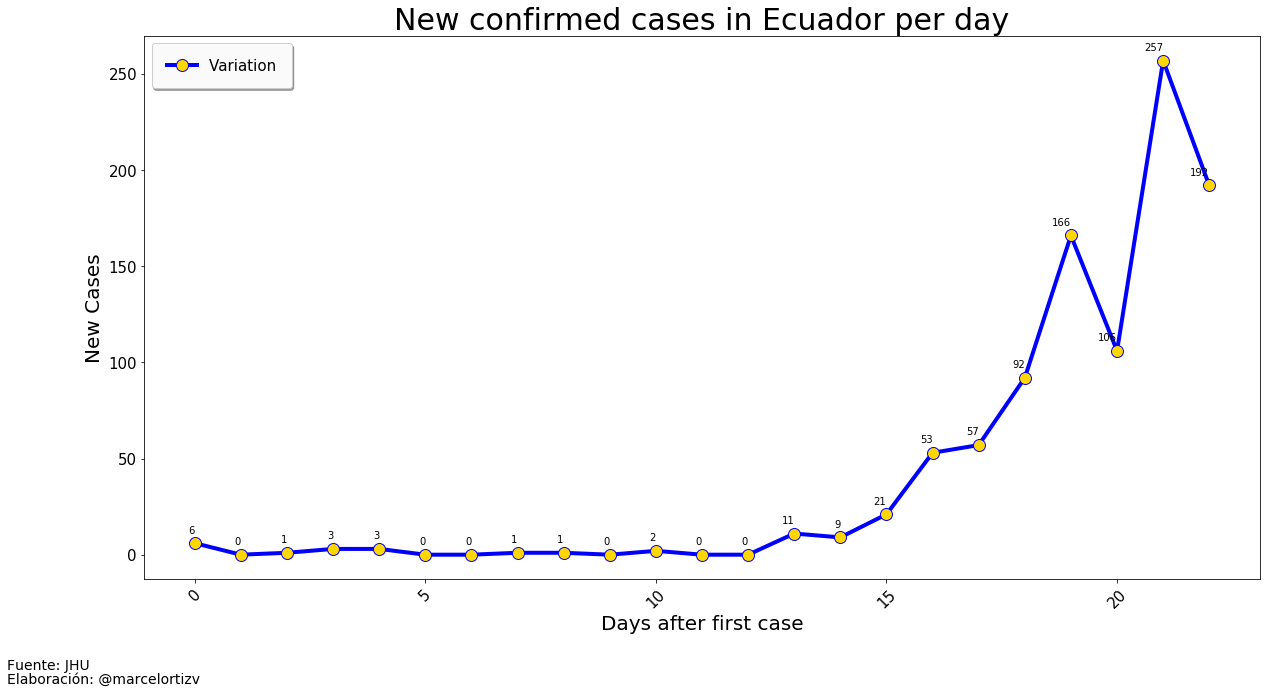

In [43]:
diff = []
for i in range(1, len(confirmed_ec)):
    value = confirmed_ec[i] - confirmed_ec[i-1]
    diff.append(value)

# set plotsize
plt.figure(figsize=(20,10))

variation= diff
# creating the plot
plt.plot(variation
        , color = 'blue'
        , label = 'Variation'
        , marker = 'o'
        , markerfacecolor='gold'
        , markersize=12
        , linewidth=4)

days_vec = np.array([i for i in range(len(variation))])

for x,y in zip(days_vec, variation):

    label = "{:.0f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='right') # horizontal alignment can be left, right or center

# titles parameters
plt.title('New confirmed cases in Ecuador per day',size=30)
plt.ylabel('New Cases',size=20)
plt.xlabel('Days after first case',size=20)
plt.xticks(rotation=45,size=15)
plt.yticks(size=15)
plt.text(0.03, 0, 'Fuente: JHU', fontsize=14, transform=plt.gcf().transFigure)
plt.text(0.03, -0.02, 'Elaboración: @marcelortizv', fontsize=14, transform=plt.gcf().transFigure)
# legend parameters
plt.legend(loc = "upper left"
           , frameon = True
           , fontsize = 15
           , ncol = 1
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1)

In [46]:
# selecting ecuadorian cases 
ecuador_confirmed = df_confirmed[df_confirmed.columns[4:df_confirmed.shape[1]]][df_confirmed['Country/Region']=='Ecuador']
ecuador_confirmed = ecuador_confirmed.iloc[0:ecuador_confirmed.shape[0]].sum()

#ecuador_recovered = df_recovered[df_recovered.columns[4:df_recovered.shape[1]]][df_recovered['Country/Region']=='Ecuador']
#ecuador_recovered = ecuador_recovered.iloc[0:ecuador_recovered.shape[0]].sum()

ecuador_deaths = df_death[df_death.columns[4:df_death.shape[1]]][df_death['Country/Region']=='Ecuador']
ecuador_deaths = ecuador_deaths.iloc[0:ecuador_deaths.shape[0]].sum()

In [47]:
# creating a list with confirmed, recovered and deaths cases
#list_of_tuples = list(zip(ecuador_confirmed, ecuador_recovered, ecuador_deaths)) 
list_of_tuples = list(zip(ecuador_confirmed, ecuador_deaths)) 

# creating a dataframe with this list to plot the chart
# ecuador_cases_growth = pd.DataFrame(list_of_tuples, index = ecuador_confirmed.index, columns = ['confirmed', 'recovered','deaths'])
ecuador_cases_growth = pd.DataFrame(list_of_tuples, index = ecuador_confirmed.index, columns = ['confirmed', 'deaths'])

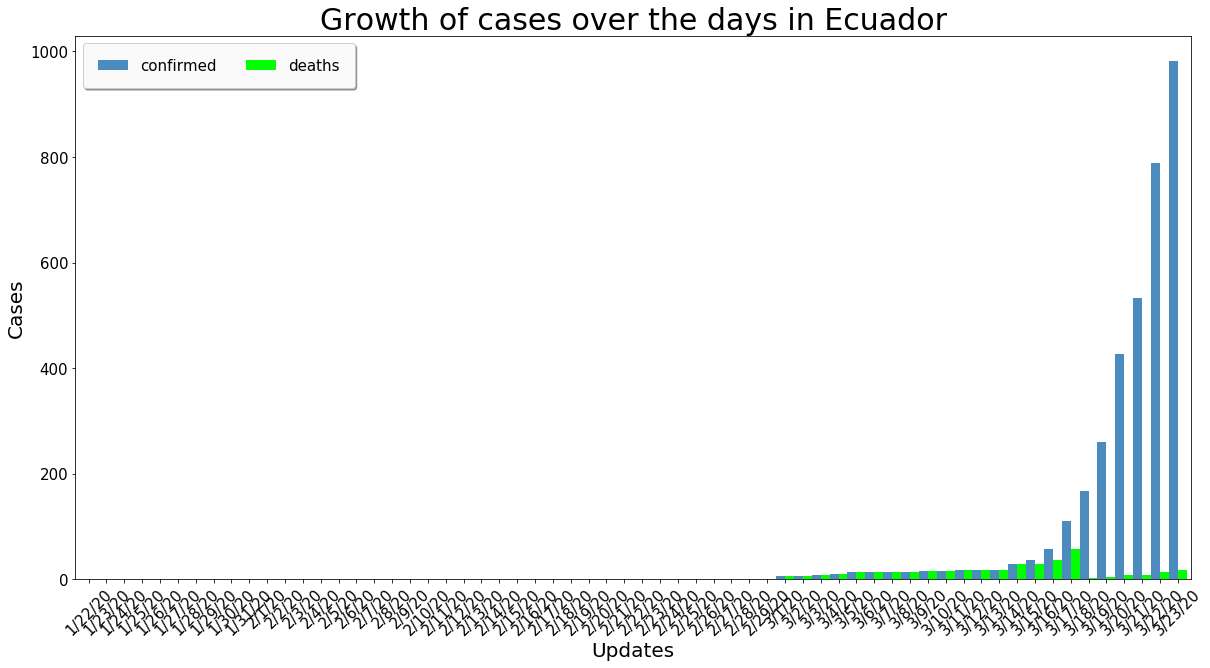

In [48]:
# creating the plot
ecuador_cases_growth.plot(kind='bar'
                                  , figsize=(20,10)
                                  , width=1
                                  , color=['#4b8bbe','lime','red']
                                  , rot=2)

# defyning title, labels, ticks and legend parameters
plt.title('Growth of cases over the days in Ecuador', size=30)
plt.xlabel('Updates', size=20)
plt.ylabel('Cases', size=20)
plt.xticks(rotation=45, size=15)
plt.yticks(size=15)
plt.legend(loc = "upper left"
           , frameon = True
           , fontsize = 15
           , ncol = 2 
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1)

## Total Cases in countries different from China

In [49]:
# input
last_update = dt.datetime.now().strftime("%#m/%d/%y")


other_countries = df_confirmed[['Country/Region','Province/State',last_update]][df_confirmed['Country/Region'] != 'China']
other_countries['recovered'] = df_recovered[last_update][df_recovered['Country/Region'] != 'China']
other_countries['deaths'] = df_death[last_update][df_death['Country/Region'] != 'China']

# sum the cases by country/region
other_countries = other_countries.groupby(other_countries['Country/Region']).sum()

# renaming the columns
other_countries = other_countries.rename(columns = {last_update:'confirmed','recovered':'recovered','deaths':'deaths'})

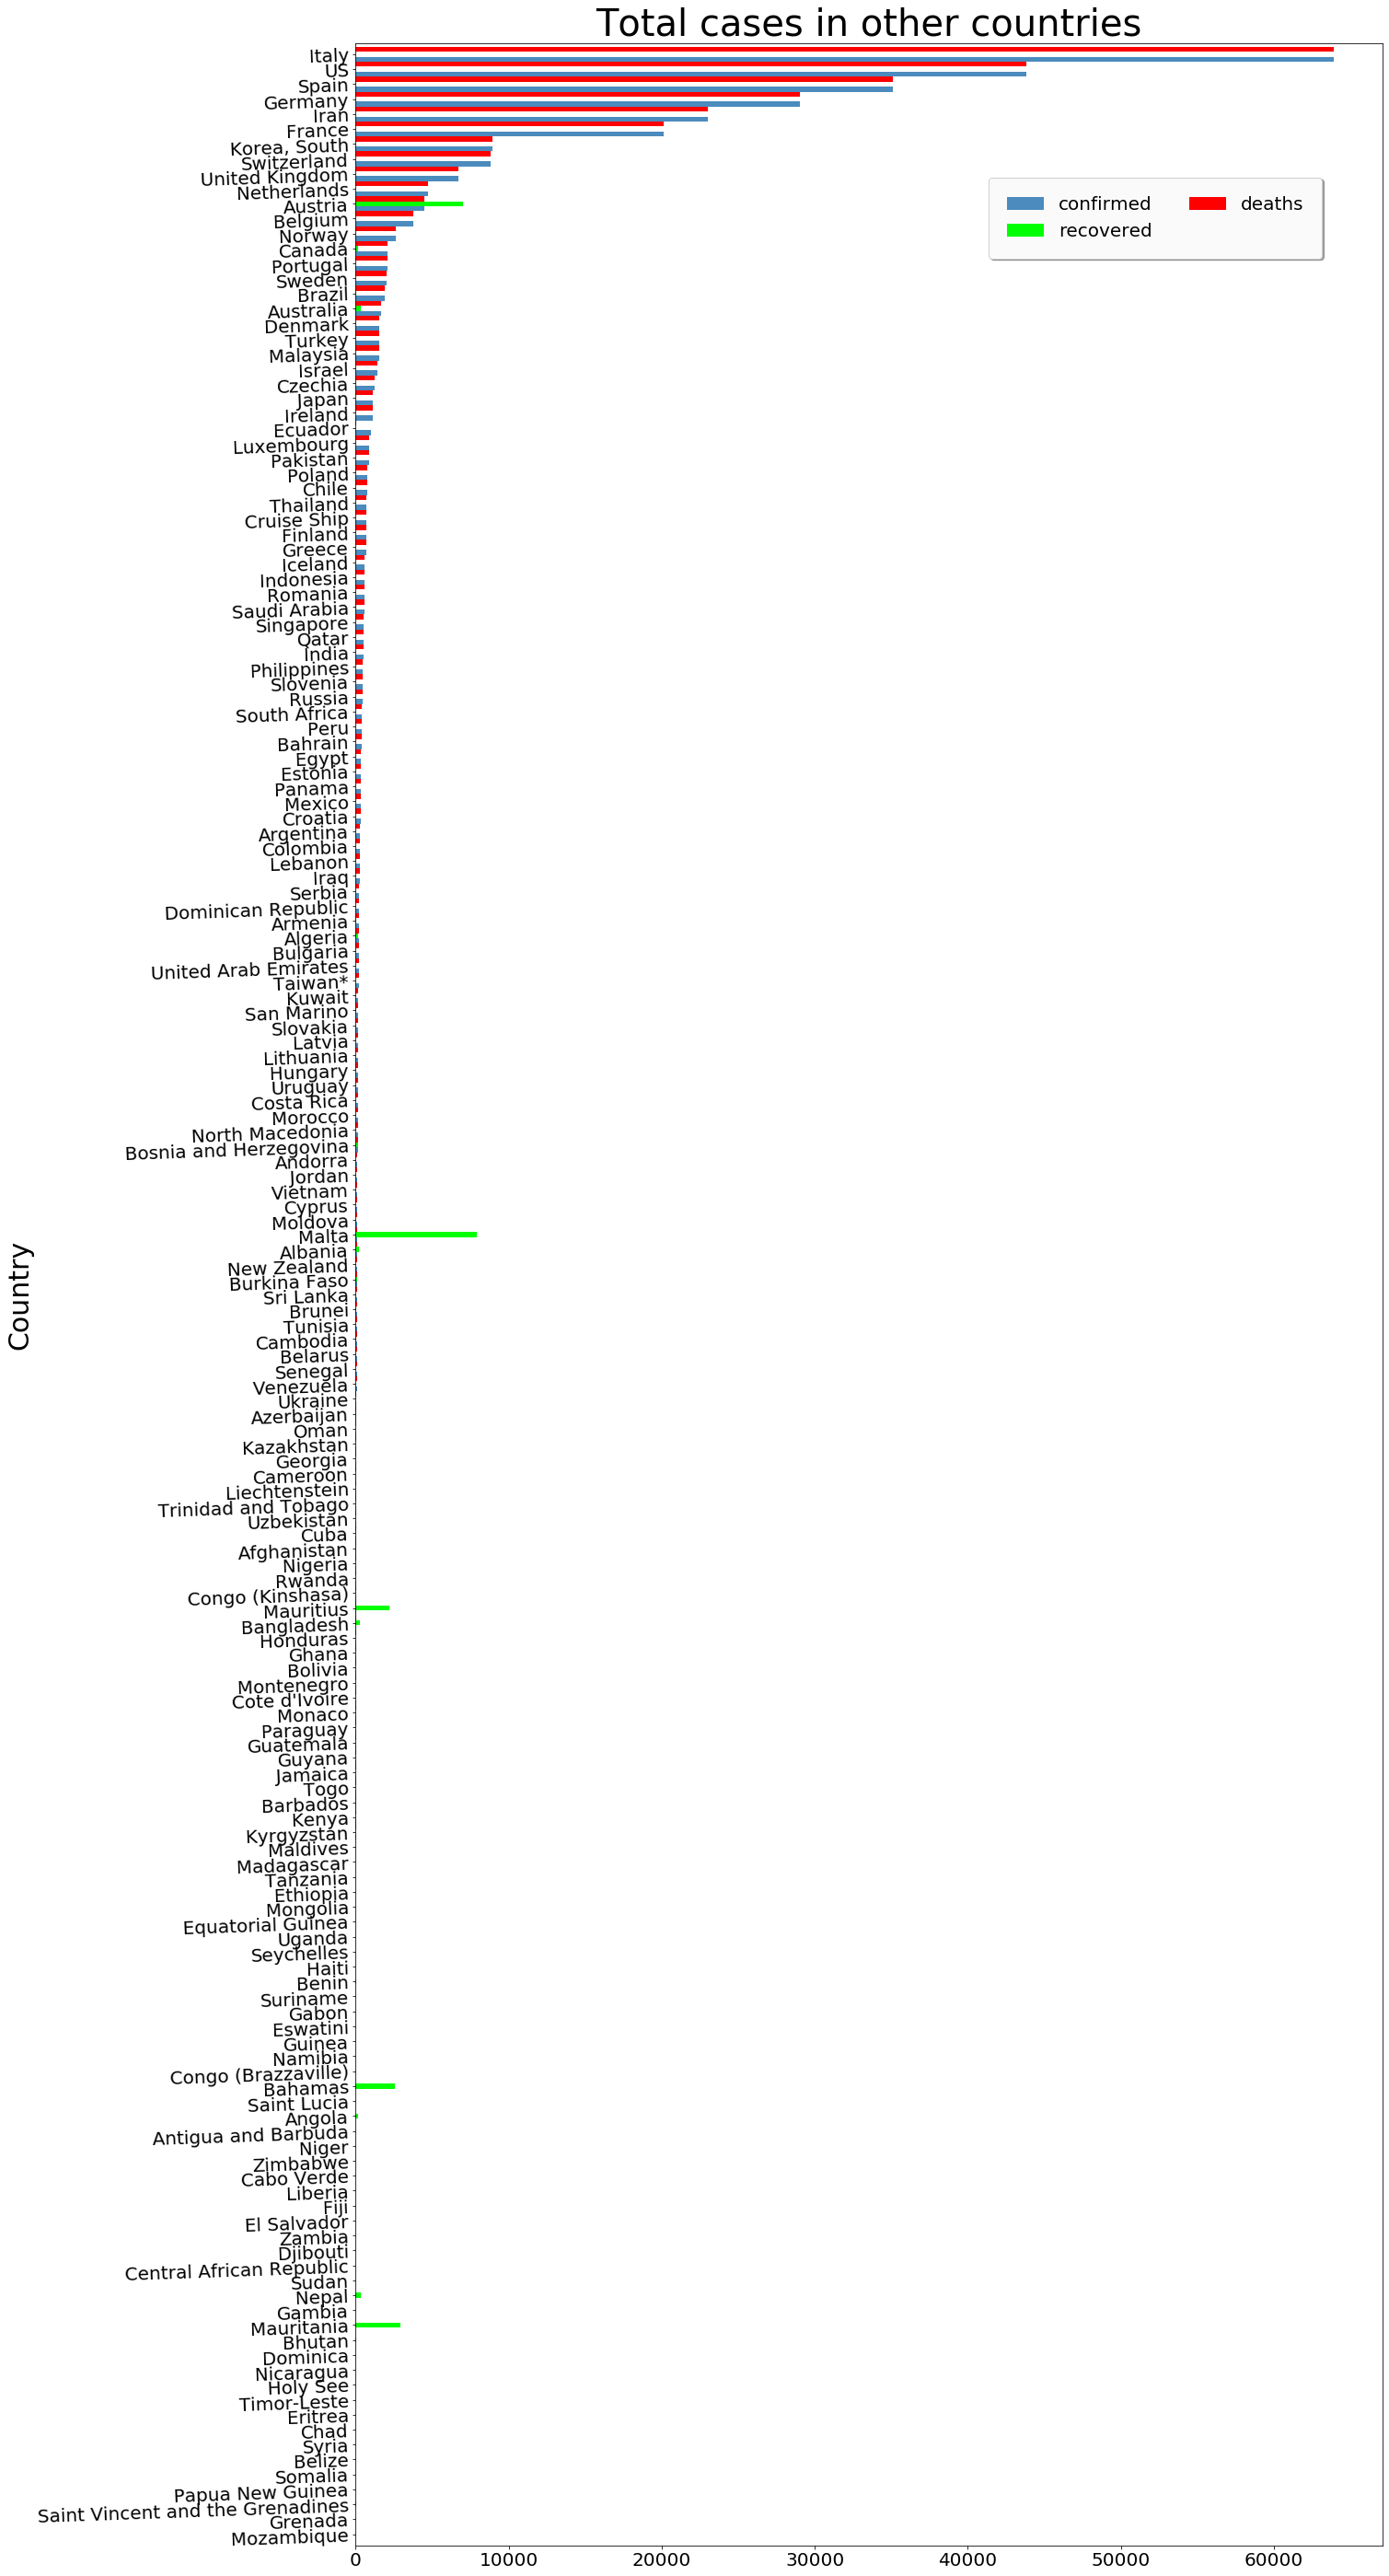

In [50]:
# creating the plot
other_countries.sort_values(by='confirmed',ascending=True).plot(kind='barh'
                                                                , figsize=(20,50)
                                                                , color = ['#4b8bbe','lime','red']
                                                                , width=1
                                                                , rot=2)

# defyning titles, labels, xticks and legend parameters
plt.title('Total cases in other countries', size=40)
plt.ylabel('Country',size=30)
plt.yticks(size=20)
plt.xticks(size=20)
plt.legend(bbox_to_anchor=(0.95,0.95)
           , frameon = True
           , fontsize = 20
           , ncol = 2 
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1)

In [52]:
# selecting cases by country that are located outside of China
other_countries_confirmed = df_confirmed[df_confirmed.columns[4:df_confirmed.shape[1]]][df_confirmed['Country/Region']!='China']
other_countries_confirmed = other_countries_confirmed.iloc[0:other_countries_confirmed.shape[0]].sum()

#other_countries_recovered = df_recovered[df_recovered.columns[4:df_recovered.shape[1]]][df_recovered['Country/Region']!='China']
#other_countries_recovered = other_countries_recovered.iloc[0:other_countries_recovered.shape[0]].sum()

other_countries_deaths = df_death[df_death.columns[4:df_death.shape[1]]][df_death['Country/Region']!='China']
other_countries_deaths = other_countries_deaths.iloc[0:other_countries_deaths.shape[0]].sum()

In [53]:
# creating a list with confirmed, recovered and deaths cases
list_of_tuples = list(zip(other_countries_confirmed, other_countries_recovered, other_countries_deaths)) 

# creating a dataframe with this list to plot the chart
other_countries_cases_growth = pd.DataFrame(list_of_tuples, index = other_countries_confirmed.index, columns = ['confirmed', 'recovered','deaths'])

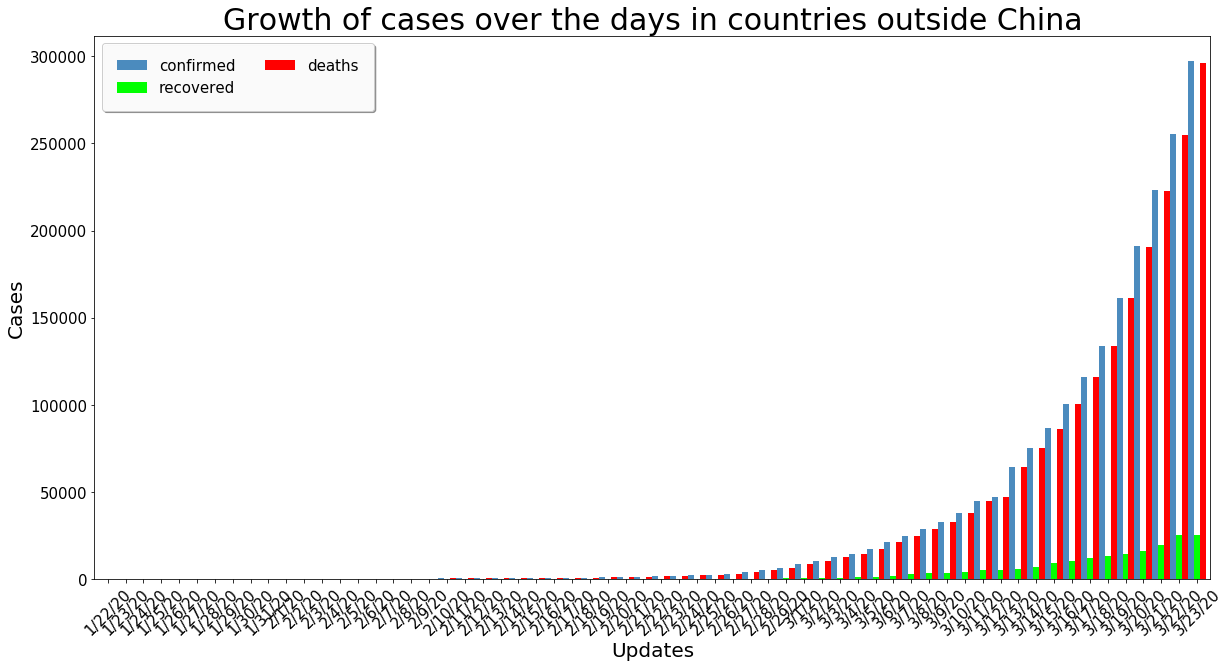

In [54]:
# creating the plot
other_countries_cases_growth.plot(kind='bar'
                                  , figsize=(20,10)
                                  , width=1
                                  , color=['#4b8bbe','lime','red']
                                  , rot=2)

# defyning title, labels, ticks and legend parameters
plt.title('Growth of cases over the days in countries outside China', size=30)
plt.xlabel('Updates', size=20)
plt.ylabel('Cases', size=20)
plt.xticks(rotation=45, size=15)
plt.yticks(size=15)
plt.legend(loc = "upper left"
           , frameon = True
           , fontsize = 15
           , ncol = 2 
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1)

## Some Countries in South America

In [479]:
# taking cases in Ecuador
ecuador = other_countries[other_countries.index=="Ecuador"]
ecuador = ecuador.iloc[0]

# taking cases in Brazil
brasil = other_countries[other_countries.index=="Brazil"]
brasil = brasil.iloc[0]

# taking cases in Chile
chile = other_countries[other_countries.index=="Chile"]
chile = chile.iloc[0]

# taking cases in Peru
peru = other_countries[other_countries.index=="Peru"]
peru = peru.iloc[0]

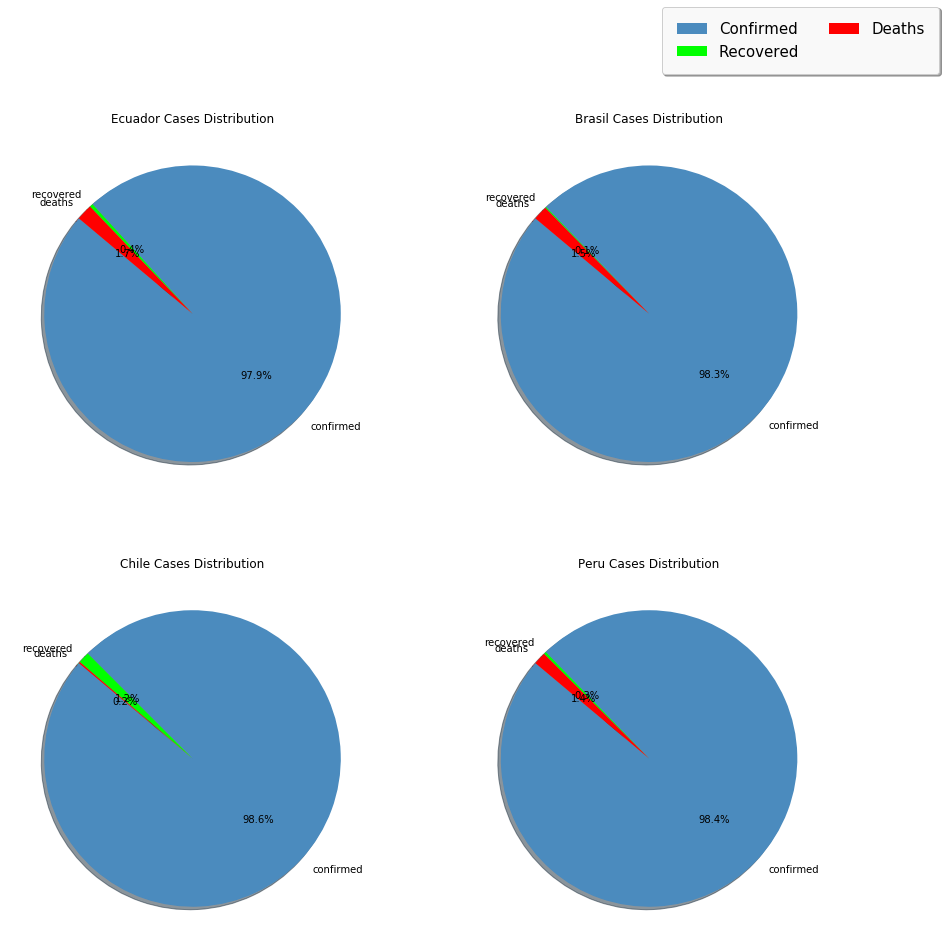

In [480]:
fig, axes = plt.subplots(
                     ncols=2,
                     nrows=2,
                     figsize=(15, 15))

ax1, ax2, ax3, ax4 = axes.flatten()

ax1.pie(ecuador
        , colors=['#4b8bbe','lime','red']
        , autopct='%1.1f%%' # adding percentagens
        , labels=['confirmed','recovered','deaths']
        , shadow=True
        , startangle=140)
ax1.set_title("Ecuador Cases Distribution")

ax2.pie(brasil
           , colors=['#4b8bbe','lime','red']
           , autopct='%1.1f%%' # adding percentagens
           , labels=['confirmed','recovered','deaths']
           , shadow=True
           , startangle=140)
ax2.set_title("Brasil Cases Distribution")

ax3.pie(chile
           , colors=['#4b8bbe','lime','red']
           , autopct='%1.1f%%' # adding percentagens
           , labels=['confirmed','recovered','deaths']
           , shadow=True
           , startangle=140)
ax3.set_title("Chile Cases Distribution")

ax4.pie(peru
           , colors=['#4b8bbe','lime','red']
           , autopct='%1.1f%%' # adding percentagens
           , labels=['confirmed','recovered','deaths']
           , shadow=True
           , startangle=140)
ax4.set_title("Peru Cases Distribution")

fig.legend(['Confirmed','Recovered','Deaths']
           , loc = "upper right"
           , frameon = True
           , fontsize = 15
           , ncol = 2 
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1)

plt.show()